# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Общие положения

**Цель проекта** - установка параметров для создания автоматизированной системы отслеживания аномалий и мошеннической деятельности на рынке недвижимости.

**Основные шаги:**

1. Открытие файла с данными и изучение общей информации;

2. Предобработка данных, заполнение пропусков, обработка непонятных значений;

3. Расчет необходимых параметров для анализа;

4. Исследовательский анализ данных;

5. Общий вывод.

**Описание полей данных:**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

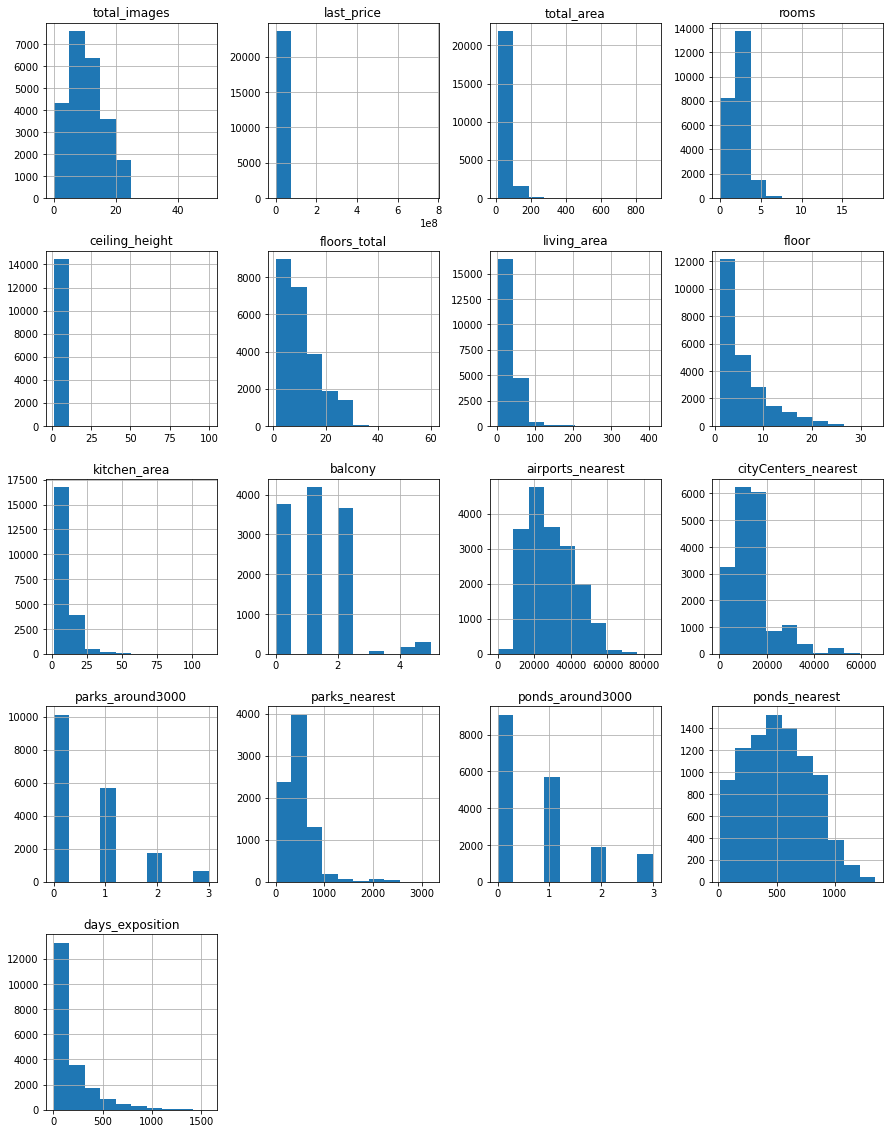

In [4]:
data.hist(figsize = (15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Исходя из полученной информации о данных, можно сказать, что в столбцах: first_day_exposition, is_apartment, balcony, ponds_around3000 неверно указан тип данных, также названия столбцов  cityCenters_nearest, parks_around3000, ponds_around3000 приведены не в соответствии с правилами. Присутствуют неявные дубликаты в столбце locality_name. Наблюдается наличие пропущенных/отсутствующих значений в таблице, а так же некоторых данных, которые сильно выбиваются из общей массы по значениям.

### Предобработка данных

####  Найдем и изучим пропущенные значения в столбцах

In [6]:
data.shape[0]

23699

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассчитаем % пропусков столбца ceiling_height 

In [10]:
print(data['ceiling_height'].isna().sum() / len(data) *100) 

38.799105447487236


38% достаточно много, попробуем пропуски заменить медианным значением, но после устраннения редких и выбивающихся значений
Возмжно высота потолков не указана из-за незнания собственников квартир

Рассчитаем % пропусков столбца is_apartment

In [11]:
print(data['is_apartment'].isna().sum() / len(data) *100) 

88.2906451749019


88%  пропусков это очень много, возможно собственники не указали апартаменты, так как их сложнее продать, из-за того, что они не являются жилым помещением

In [12]:
#Заменим пустые значения на false
data['is_apartment'] = data['is_apartment'].fillna(0)

Рассчитаем % пропусков столбца floors_total от общего количества значений

In [13]:
print(data['floors_total'].isna().sum() / len(data) *100)  

0.36288450989493226


0,4% - это небольшое количество пропусков, поэтому исключим их

In [14]:
data = data.dropna(subset=['floors_total'])

In [15]:
print(data['floors_total'].isna().sum() / len(data) *100)

0.0


Рассчитаем % пропусков столбца living_area от общего количества значений

In [16]:
print(data['living_area'].isna().sum() / len(data) *100)  

7.919366450683945


8% пропускаов скорее всего говорят о том, что владельцы не знают площадь своих квртир, здесь также оставим пропуски, так как неккоретно использовать среднее значение и медиану

Рассчитаем % пропусков столбца kitchen_area от общего количества значений

In [17]:
print(data['kitchen_area'].isna().sum() / len(data) *100) 

9.448185321644857


Возможно эти пропуски относятся к квартирам-студиям, где объеденины жилая комната и кухня, поэтому отсутствующие значения можно заменить на 0

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [19]:
data['kitchen_area'].isna().sum()

0

Рассчитаем % пропусков столбца balcony от общего количества значений

In [20]:
print(data['balcony'].isna().sum() / len(data) *100) 

48.61728708762122


Почти половина значений отсутствует, это говорит о том, что у данных квартир нет балкона, заменим пустые значения на 0

In [21]:
data['balcony'] = data['balcony'].fillna(0)

In [22]:
data['balcony'].isna().sum()

0

Рассчитаем % пропусков столбца locality_name от общего количества значений

In [23]:
print(data['locality_name'].isna().sum() / len(data) *100) 

0.2032778554186253


0,2% - это очень мало, скорее всего причиной пропуска стал снова человеческий фактор, оставим пропуски, как есть

Рассчитаем % пропусков столбца airports_nearest от общего количества значений

In [24]:
print(data['airports_nearest'].isna().sum() / len(data) *100) 

23.427772836996567


23% пропусков может говорить о человеческом факторе

Рассчитаем % пропусков столбца cityCenters_nearest от общего количества значений

In [25]:
print(data['cityCenters_nearest'].isna().sum() / len(data) *100) 

23.330368864608477


23% пропусков может говорить может говорить о человеческом факторе

Рассчитаем % пропусков столбца parks_around3000 от общего количества значений

In [26]:
print(data['parks_around3000'].isna().sum() / len(data) *100) 

23.326133909287257


23% пропусков может говорить может говорить о человеческом факторе

Рассчитаем % пропусков столбца pponds_nearest от общего количества значений

In [27]:
print(data['ponds_nearest'].isna().sum() / len(data) *100) 

61.62706983441325


62% пропущено, связано возможно с человеческим фактором, заполнять пропущенные значения не будем, так как данный показатель не используется при дальнейшем исследовании

Рассчитаем % пропусков столбца pponds_nearest от общего количества значений

In [28]:
print(data['days_exposition'].isna().sum() / len(data) *100) 

13.433278278914157


В данном случае возможно объявления не сняты с публикации, поэтому пропущены значения

#### Рассмотрим типы данных в каждом столбце

Неверный тип данных в следующих столбцах:
Дата публикации first_day_exposition (object-должно быть datetime)
Апартаменты is_apartment (object-должно быть bool)
Число балконов balcony (float - должно быть int) 
Число водоемов в радиусе 3 км ponds_around3000 (float - должно быть int)
Общее количество этажей floors_total (float - должно быть int)

Заменим тип данных по дате публикации со строчного на datetime в столбце first_day_exposition

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Заменим тип данных c object на  bool (апартаменты предусматривают заполнение true or false) в столбце is_apartment

In [30]:
data['is_apartment'] = data['is_apartment'].astype('bool') 

Заменим тип данных c float на  int (количество балконов не может быть дробью) в столбце balcony

In [31]:
data['balcony'] = data['balcony'].astype(int)

Заменим тип данных c float на  int (количество водоемов не может быть дробью) ponds_around3000

In [32]:
data['ponds_around3000'] = data['ponds_around3000'].astype("Int64") 

Заменим тип данных c float на int (общее количество этажей не может быть дробью) floors_total

In [33]:
data['floors_total'] = data['floors_total'].astype("Int64") 

Проверим внесенные изменения

In [34]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

Тип данных заменен в 5 столбцах, это поможет сократить количество ошибок, ускорить написание кода и улучшить его качество.

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

Проверим наличие явных дубликатов

In [35]:
data.duplicated().sum() 

0

Явных дубликатов нет

Приведем к единому стилю наименования столбцов

In [36]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'}) 

In [37]:
data.head(5) #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1,48.0,121.0


Рассмотрим неявные дубликаты

In [38]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Выполним замену написания 'посёлок' на 'поселок'

In [39]:
data['locality_name'] = data['locality_name'].replace('посёлок','поселок')

Уберем повторы в названиях населенных пунктов

In [40]:
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 
                                      'городской поселок Советский': 'поселок городского типа Советский', 
                                      'городской поселок Большая Ижора': 'поселок городского типа Большая Ижораэ', 
                                      'деревня Кудрово': 'Кудрово', 'деревня Зимитцы': 'поселок Зимитцы', 
                                      'деревня Калитино': 'поселок Калитино', 
                                      'городской поселок Федоровское': 'деревня Федоровское', 
                                      'деревня Щеглово': 'поселок Щеглово', 'коттеджный поселок Лесное': 
                                      'поселок Лесное', 'поселок станции Громово': 'поселок Громово', 
                                      'деревня Зимитицы': 'поселок Зимитцы', 'Любань': 'поселок Любань', 
                                      'Мурино': 'поселок Мурино', 'деревня Рябитцы': 'поселок Рябитцы', 
                                      'поселок Рябово': 'поселок городского типа Рябово', 
                                      'городской поселок Лесогорский': 'поселок городского типа Лесогорский', 
                                      'городской поселок Назия': 'поселок городского типа Назия', 
                                      'садовое товарищество Приладожский': 'поселок городского типа Приладожский', 
                                      'садовое товарищество Рахья': 'поселок городского типа Рахья', 
                                      'городской поселок Рощино': 'поселок городского типа Рощино', 
                                      'поселок при железнодорожной станции станции Вещево': 'поселок станции Вещево',  
                                      'поселок при железнодорожной станции станции Приветнинское': 'поселок станции Приветнинское', 
                                      'Мурино': 'поселок Мурино', 
                                      'деревня Щеглово': 'поселок Щеглово', 
                                      'городской поселок Мга': 'поселок городского типа Мга', 
                                      'городской поселок Павлово': 'поселок городского типа Павлово'}}) 
        
          
      

Если обратить внимание, в таблице с наименованиями населенных пунктов имеется значение nan, необходимо его удалить

In [41]:
data = data.dropna(subset=['locality_name'])

In [42]:
data['locality_name'].sort_values().unique() # проверим 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',


In [43]:
# check
data.locality_name.nunique()

356

Найдем количество дубликатов по столбцу floor

In [47]:
data['floor'].duplicated().sum() 

23532

Найдем количество дубликатов по столбцу floors_total

In [48]:
data['floors_total'].duplicated().sum()

23529

Найдем количество дубликатов по столбцу total_area

In [49]:
data['total_area'].duplicated().sum()

21406

Найдем количество дубликатов по столбцу total_area

In [50]:
data['locality_name'].duplicated().sum()

23244

Найдем количество дубликатов по столбцу rooms

In [51]:
data['rooms'].duplicated().sum()

23548

Данные дубликаты никак не повлияют на наше исследование.

Проверим повторно данные на наличие явных дубликатов

In [52]:
data.duplicated().sum() 

0

#### Найдем и устраним редкие и выбивающиеся значения

In [53]:
data.shape[0]

23565

In [54]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Можно заметить, что встречаются потолки размером 14, 20, 30 метров и т.д., скорее всего здесь должна стоять запятая, следовательно такие значения необходимо разделить на 10

In [55]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

Вычислим медианное значение по высоте потолков ограничив выборку предельно-допустимыми значениями

In [56]:
data.query('ceiling_height > 2 and ceiling_height < 5')['ceiling_height'].median() 

2.65

Так как высота потолков в сталинках может быть около 4 м, я использовала значение 5 м (возможно такие квартиры есть), теперь необходимо значения, которые больше 5 м заменить медианным значением. Так же это касается и значений высоты потолка меньше 2 м, так как по СНиП минимальная высота должна быть 2.1 м

In [57]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.65

In [58]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = 2.65

In [59]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65) # заполним пустые значения медианным значением

In [60]:
data['ceiling_height'].isna().sum() # проверим замену пустых значений

0

In [61]:
data['ceiling_height'].unique() # проверим заменились ли отклонения

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.  , 2.79, 2.95, 4.06, 2.94, 3.82,
       3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35,
       2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75,
       2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 ,
       3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97,
       3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63,
       3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02,
       3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51,
       3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.

In [62]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.696022,10.675875,34.454822,5.878124,9.565173,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.215921,6.594823,22.045359,4.871485,6.407798,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,6.300000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,11.410000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Рассмотрим отклонения по столбцу floors_total

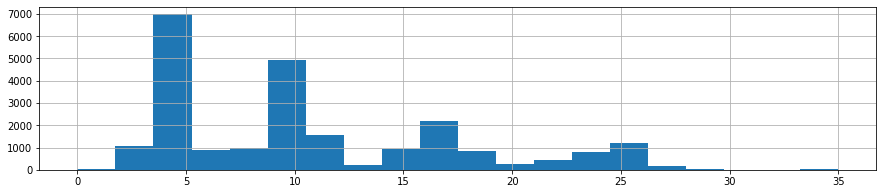

In [63]:
data.floors_total.hist(bins = 20, figsize = (15,3), range = (0, 35));

Так как в Санкт-Петербурге дома выше 30 этажей - это редкость, поэтому исключим эти значения

In [64]:
data = data.drop(data[data['floors_total'] > 30].index)

In [65]:
data.query('floors_total > 30') # проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [66]:
data['last_price'] = data['last_price'] / 1000000 #переведем в миллионы

In [67]:
print(data['last_price'])

0        13.000
1         3.350
2         5.196
3        64.900
4        10.000
          ...  
23694     9.700
23695     3.100
23696     2.500
23697    11.475
23698     1.350
Name: last_price, Length: 23533, dtype: float64


In [68]:
data['last_price'].describe()

count    23533.000000
mean         6.539952
std         10.918063
min          0.012190
25%          3.400000
50%          4.632000
75%          6.775000
max        763.000000
Name: last_price, dtype: float64

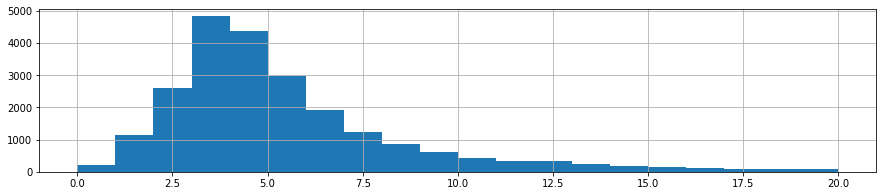

In [69]:
data.last_price.hist(bins = 20, figsize = (15,3), range = (0, 20));

Размах равен 3.4, нижняя граница равна 1.7, верхняя граница равна 13.6, исключим значения 0.012190 и выше 13.6

In [70]:
data = data.drop(data[data['last_price'] > 13.6].index)

In [71]:
data = data.drop(data[data['last_price'] == 0.012190].index)

In [73]:
data.query('1.7 > last_price > 13.6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Рассмотрим отклонения по столбцу total_area

In [74]:
data['total_area'].describe()

count    22027.000000
mean        54.407226
std         20.654800
min         12.000000
25%         39.100000
50%         50.000000
75%         65.000000
max        255.000000
Name: total_area, dtype: float64

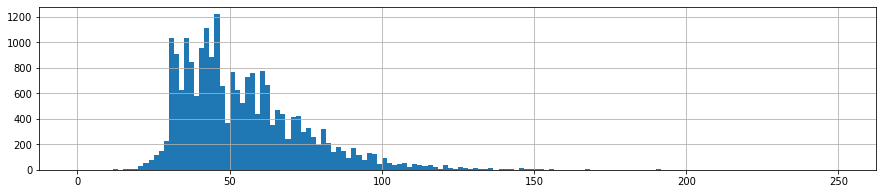

In [75]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (0, 250));

Все квартиры менее 20-ти и более 250-ти квадратных метров исключаем.

In [76]:
data = data.drop(data[data['total_area'] > 200].index)

In [77]:
data = data.drop(data[data['total_area'] < 20].index)

In [78]:
data.query('20 > total_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Рассмотрим отклонения по столбцу rooms	

In [79]:
data.query('rooms == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2.450,27.00,2017-03-30,0,2.65,24,15.50,2,False,...,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,<NA>,NaN,181.0
349,4,2.320,25.00,2017-09-27,0,2.65,14,17.00,1,False,...,0.0,0,Кудрово,NaN,NaN,NaN,NaN,<NA>,NaN,45.0
440,8,2.480,27.11,2018-03-12,0,2.65,17,24.75,4,False,...,0.0,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2,982.0,64.0
508,0,3.375,34.40,2017-03-28,0,2.65,26,24.30,19,False,...,0.0,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1,593.0,430.0
608,2,1.850,25.00,2019-02-20,0,2.65,10,NaN,7,False,...,0.0,0,поселок Шушары,NaN,NaN,NaN,NaN,<NA>,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.200,26.00,2017-09-01,0,2.65,25,18.00,16,False,...,0.0,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1,623.0,14.0
23442,0,2.500,27.70,2017-09-28,0,2.65,24,18.00,4,False,...,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,<NA>,NaN,4.0
23554,15,3.350,26.00,2018-09-07,0,2.65,19,NaN,8,False,...,0.0,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2,112.0,31.0
23592,10,1.450,29.00,2017-11-11,0,2.65,9,18.00,8,False,...,0.0,2,село Никольское,NaN,NaN,NaN,NaN,<NA>,NaN,82.0


In [80]:
data.query('rooms == 0 & living_area == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [81]:
data.query('rooms == 0 & kitchen_area > 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [82]:
data.rooms.value_counts().to_frame()

,rooms
1,7947
2,7653
3,5184
4,839
0,182
5,154
6,31
7,4


Исключим объявления с количеством комнат больше 7

In [83]:
data = data.drop(data[data['rooms'] > 7].index)

In [84]:
data.rooms.value_counts().to_frame()

,rooms
1,7947
2,7653
3,5184
4,839
0,182
5,154
6,31
7,4


In [85]:
data.query('total_area > 0 & rooms == 0 & (living_area == 0 or kitchen_area == 0)').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2.450,27.00,2017-03-30,0,2.65,24,15.50,2,False,...,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,<NA>,NaN,181.0
349,4,2.320,25.00,2017-09-27,0,2.65,14,17.00,1,False,...,0.0,0,Кудрово,NaN,NaN,NaN,NaN,<NA>,NaN,45.0
440,8,2.480,27.11,2018-03-12,0,2.65,17,24.75,4,False,...,0.0,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2,982.0,64.0
508,0,3.375,34.40,2017-03-28,0,2.65,26,24.30,19,False,...,0.0,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1,593.0,430.0
608,2,1.850,25.00,2019-02-20,0,2.65,10,NaN,7,False,...,0.0,0,поселок Шушары,NaN,NaN,NaN,NaN,<NA>,NaN,29.0


In [86]:
data.query('total_area == 25.00') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
322,6,2.000000,25.0,2017-02-07,1,2.65,5,NaN,5,False,...,0.0,0,Выборг,NaN,NaN,NaN,NaN,<NA>,NaN,45.0
349,4,2.320000,25.0,2017-09-27,0,2.65,14,17.0,1,False,...,0.0,0,Кудрово,NaN,NaN,NaN,NaN,<NA>,NaN,45.0
546,0,6.000001,25.0,2018-11-16,1,3.00,5,NaN,5,False,...,0.0,0,Санкт-Петербург,25169.0,3871.0,1.0,207.0,1,776.0,17.0
608,2,1.850000,25.0,2019-02-20,0,2.65,10,NaN,7,False,...,0.0,0,поселок Шушары,NaN,NaN,NaN,NaN,<NA>,NaN,29.0
2103,8,2.900000,25.0,2019-02-21,0,2.65,18,15.0,18,False,...,0.0,2,Кудрово,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2165,15,3.180000,25.0,2019-03-21,1,2.50,25,17.0,17,False,...,3.0,0,поселок Мурино,NaN,NaN,NaN,NaN,<NA>,NaN,19.0
2719,18,2.400000,25.0,2017-08-16,0,2.65,25,21.0,12,False,...,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,<NA>,NaN,384.0
3557,11,1.950000,25.0,2017-12-18,1,2.65,2,NaN,1,False,...,0.0,0,Выборг,NaN,NaN,NaN,NaN,<NA>,NaN,36.0
3907,20,3.740000,25.0,2018-02-19,1,3.00,5,17.0,4,False,...,7.4,0,Санкт-Петербург,20277.0,6390.0,1.0,142.0,2,708.0,164.0
4418,1,2.300000,25.0,2016-05-24,1,2.65,20,NaN,6,False,...,0.0,0,поселок Мурино,NaN,NaN,NaN,NaN,<NA>,NaN,367.0


Встречаются несколько объявлений, где общая площадь равна 25.0, либо нет комнат или есть 1, а остальная информация NaN.

Рассмотрим отклонения по столбцу airports_nearest

In [87]:
data.query('airports_nearest == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0,NaN,60.0


Продается квартира, которая находится прямо в аэоропорту, странно, но оставим как есть

In [88]:
data['airports_nearest'].head(5)

0    18863.0
1    12817.0
2    21741.0
4    31856.0
5        NaN
Name: airports_nearest, dtype: float64

Рассмотрим отклонения по столбцу ponds_nearest

In [89]:
data.query('ponds_nearest == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Отклонений нет

Рассмотрим отклонения по столбцу kitchen_area

In [90]:
 (
        data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'median'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,994.00","21,994.00","21,994.00","19,256.00","21,994.00","20,306.00","21,994.00","21,994.00","21,994.00"
min,0.00,20.00,2.00,1.00,0.43,2.00,0.00,1.00,1.00
max,7.00,196.00,5.00,"1,580.00",13.60,136.10,64.00,27.00,29.00
median,2.00,50.00,2.65,92.00,4.50,29.60,8.50,4.00,9.00


In [91]:
data['kitchen_area'].describe()

count    21994.000000
mean         8.853781
std          4.793306
min          0.000000
25%          6.300000
50%          8.500000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

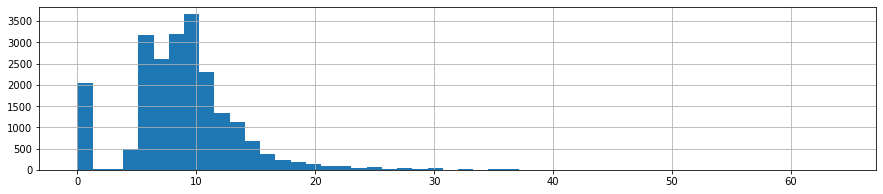

In [92]:
data.kitchen_area.hist(bins = 50, figsize = (15,3), range = (0, 64));

Исключим объявления с площадью кухни больше 25 кв м 

In [93]:
data = data.drop(data[data['kitchen_area'] > 25].index)

In [94]:
data.query('kitchen_area > 25')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Рассмотрим отклонения по столбцу living_area

In [95]:
data['living_area'].describe()

count    20133.000000
mean        31.180989
std         14.291275
min          2.000000
25%         18.200000
50%         29.600000
75%         40.000000
max        136.100000
Name: living_area, dtype: float64

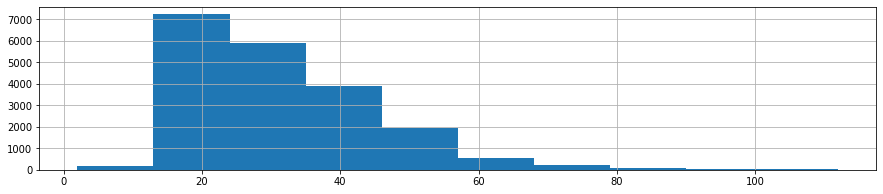

In [96]:
data.living_area.hist(bins = 10, figsize = (15,3), range = (2, 112));

Размах равен 22, низкий порог 5.45, верх- 82.45. Исключим объявления, где жилая площадь менее 6 и больше 83.

In [97]:
data = data.drop(data[data['living_area'] > 83].index)

In [98]:
data = data.drop(data[data['living_area'] < 5.45].index)

In [100]:
data.query('83 < living_area < 5.45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Рассмотрим отклонения по столбцу days_exposition

In [101]:
 (
        data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'median'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,689.00","21,689.00","21,689.00","19,005.00","21,689.00","20,010.00","21,689.00","21,689.00","21,689.00"
min,0.00,20.00,2.00,1.00,0.43,6.00,0.00,1.00,1.00
max,7.00,196.00,5.00,"1,580.00",13.60,83.00,25.00,27.00,29.00
median,2.00,50.00,2.65,92.00,4.45,29.50,8.50,4.00,9.00


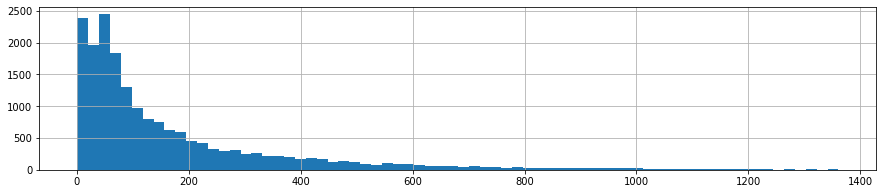

In [102]:
data.days_exposition.hist(bins = 70, figsize = (15,3), range = (1, 1361));

In [103]:
data.shape[0]

21689

Исключим объявления с количеством дней публикации больше 1200

In [105]:
data['days_exposition'].describe()

count    19005.000000
mean       173.868719
std        212.303894
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [106]:
data = data.drop(data[data['days_exposition'] > 1200].index)

In [107]:
data = data.drop(data[data['days_exposition'] <= 2].index)

In [109]:
data.query('1200 < days_exposition < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Итак, пропущенные значения в столбцах найдены и изучены, заменен тип данных в столбцах, где это требовалось, изучены уникальные значения в столбце с названиями и устранены неявные дубликаты, устранены редкие и выбивающиеся значения.

Проверим какие аномалии остались

In [111]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,617.00","21,617.00","21,617.00","18,933.00","21,617.00","19,944.00","21,617.00","21,617.00","21,617.00"
min,0.00,20.00,2.00,3.00,0.43,6.00,0.00,1.00,1.00
max,7.00,196.00,5.00,"1,200.00",13.60,83.00,25.00,27.00,29.00


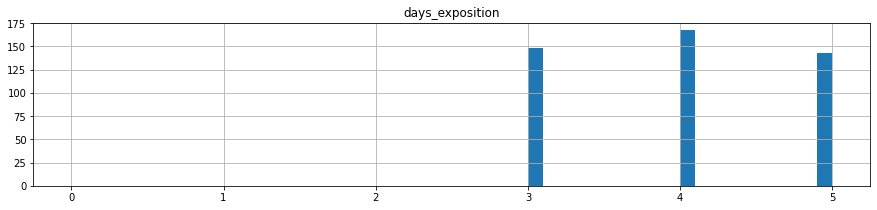

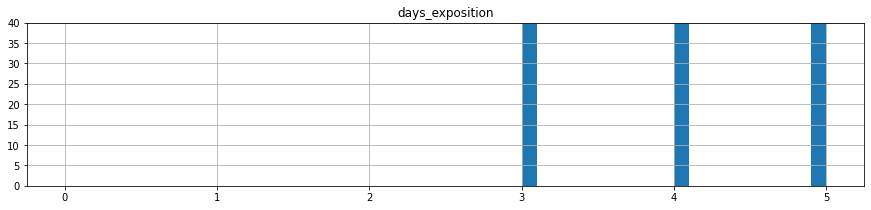

In [112]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [113]:
 (
        data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'median'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,617.00","21,617.00","21,617.00","18,933.00","21,617.00","19,944.00","21,617.00","21,617.00","21,617.00"
min,0.00,20.00,2.00,3.00,0.43,6.00,0.00,1.00,1.00
max,7.00,196.00,5.00,"1,200.00",13.60,83.00,25.00,27.00,29.00
median,2.00,49.90,2.65,91.00,4.45,29.50,8.50,4.00,9.00


In [114]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [115]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


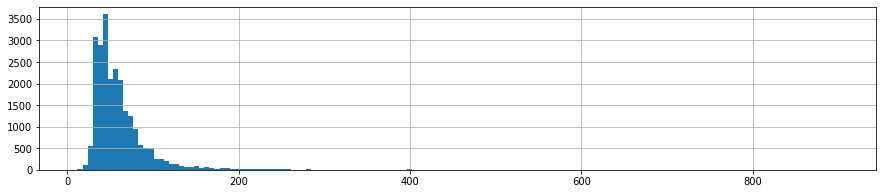

In [116]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

Все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями

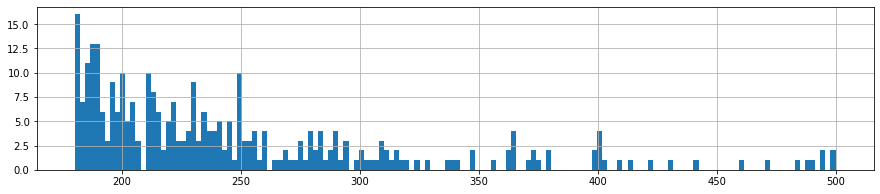

In [117]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

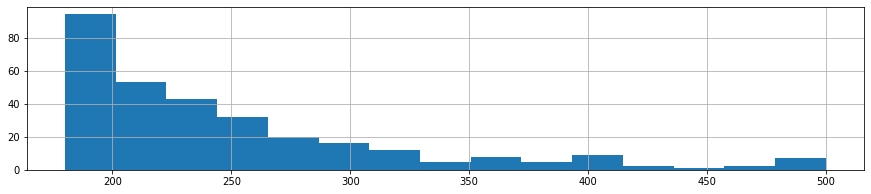

In [118]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

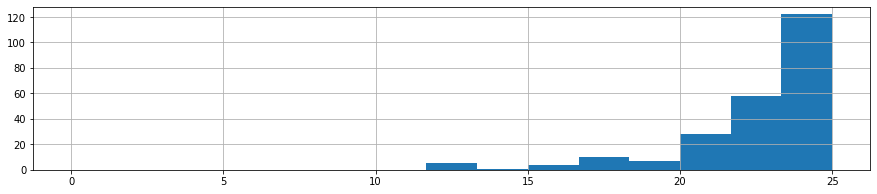

In [119]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [120]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,21.56,2.40,3.00,0.56,10.00,0.00,1.00,2.00
0.01,1.00,25.64,2.50,4.00,0.99,13.00,0.00,1.00,2.00
0.5,2.00,49.90,2.65,91.00,4.45,29.50,8.50,4.00,9.00
0.99,4.00,112.00,3.40,966.00,12.60,70.00,21.00,23.00,26.00
0.9988,5.00,135.00,4.00,"1,160.28",13.50,80.00,25.00,26.00,27.00


### Добавим в таблицу новые столбцы

Добавим столбец price_one_square_meter

In [121]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']

In [122]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2,755.0,NaN,0.120370
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0,NaN,81.0,0.082921
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2,574.0,558.0,0.092786
5,10,2.890,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,<NA>,NaN,55.0,0.095066
6,6,3.700,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0,NaN,155.0,0.099196


In [123]:
data['price_one_square_meter'].describe()

count    21617.000000
mean         0.092692
std          0.030260
min          0.007963
25%          0.075000
50%          0.093066
75%          0.110000
max          0.387097
Name: price_one_square_meter, dtype: float64

In [124]:
data['price_one_square_meter'] = data['price_one_square_meter'] * 1000000

In [125]:
data['price_one_square_meter'].mean()

92692.49597142813

 Средняя цена за кв.метр составляет 92 тыс.руб

Добавим столбец weekday_exposition, month_exposition, year_exposition

In [126]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # день недели публикации объявления

In [127]:
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц публикации объявления

In [128]:
data['year_exposition'] = data['first_day_exposition'].dt.year # год публикации объявления

In [129]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1.0,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.0,0.0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.0,1.0,90.0,2,574.0,558.0,92785.714286,3,8,2015
5,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,<NA>,NaN,55.0,95065.789474,0,9,2018
6,6,3.700,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,19143.0,0.0,NaN,0,NaN,155.0,99195.710456,3,11,2017
7,5,7.915,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,11634.0,0.0,NaN,0,NaN,NaN,110544.692737,3,4,2019
8,20,2.900,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,<NA>,NaN,189.0,87454.764777,2,5,2018
9,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,15008.0,0.0,NaN,0,NaN,289.0,88524.590164,6,2,2017
10,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,13878.0,1.0,310.0,2,553.0,137.0,127525.252525,3,11,2017
11,9,3.300,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,51677.0,0.0,NaN,0,NaN,7.0,75000.000000,0,8,2018


In [130]:
data['year_exposition'].value_counts()

2018    7937
2017    7527
2019    2616
2016    2512
2015     943
2014      82
Name: year_exposition, dtype: int64

Количество предложений на рынке недвижимости было максимальным значением в 2017 и 2018 годах, а вот в 2019 количество предложений сократилось в 3 раза и вернулось на уровень 2016 года

Разделим на тип этажа квартиры (значения — «первый», «последний», «другой»)

Новый столбец назовем floor_type

In [131]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] <= 0:
        return 'Неправильное значение'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

In [132]:
data.head(10) # проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1.0,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1.0,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
5,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,<NA>,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3.700,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7.915,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,0.0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2.900,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,<NA>,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,1.0,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой
11,9,3.300,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,0.0,NaN,0,NaN,7.0,75000.000000,0,8,2018,другой


In [133]:
data['floor_type'].value_counts()

другой       15849
последний     2984
первый        2784
Name: floor_type, dtype: int64

Можно сделать вывод, что более актуальны квартиры на любом этаже кроме первого и последнего

Рассчитаем расстояние до центра города в километрах

In [134]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [135]:
data['city_centers_nearest_km'].round(2)

0        16.03
1        18.60
2        13.93
5          NaN
6        19.14
         ...  
23694     4.23
23695      NaN
23696      NaN
23697    10.36
23698      NaN
Name: city_centers_nearest_km, Length: 21617, dtype: float64

In [136]:
data['city_centers_nearest_km'].head(10)

0     16.028
1     18.603
2     13.933
5        NaN
6     19.143
7     11.634
8        NaN
9     15.008
10    13.878
11    51.677
Name: city_centers_nearest_km, dtype: float64

Необходимые столбцы добавлены, значения по ним рассчитаны. Следует отметить, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски, на результаты исследования они не повлияют.

### Проведение исследовательского анализа данных

#### Изучим параметры объектов

In [137]:
data['total_area'].describe() #Общая площадь

count    21617.000000
mean        53.654387
std         19.213407
min         20.000000
25%         39.000000
50%         49.900000
75%         64.000000
max        196.000000
Name: total_area, dtype: float64

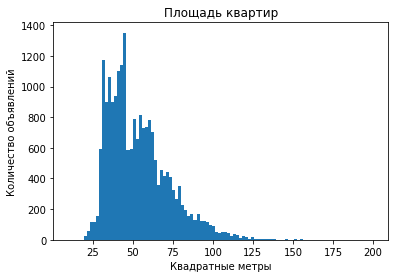

In [138]:
plt.hist(data['total_area'], bins=100, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()


Рассматриваем диапозон до 120 кв. м. Самый популярные квартиры площадью 45 кв.м, большая часть объектов недвижимости имеют площадь от 30 до 65 кв.м, площадь объектов более 100 кв.м встречается реже так же как и площадью меньше 30 кв.м Среднее значение - 60 кв.м, медиана 52 кв.м.

In [139]:
data['living_area'].describe() # Жилая площадь

count    19944.000000
mean        30.779984
std         13.380620
min          6.000000
25%         18.100000
50%         29.500000
75%         40.000000
max         83.000000
Name: living_area, dtype: float64

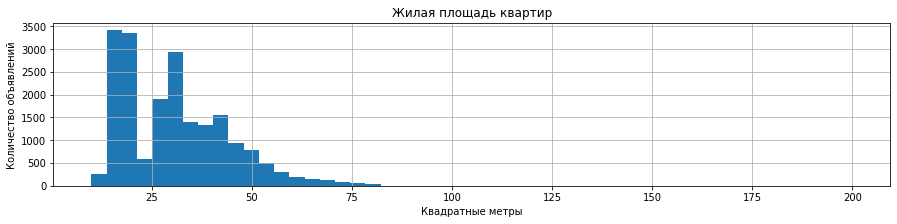

In [140]:
data.living_area.hist(bins = 50, figsize = (15,3), range = (10, 200));
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()


Рассматриваем диапозон до 55 кв. м, максимальное количество объявлений со значением около 20 кв.м, большая часть объявлений  имеют площадь от 10 до 45 кв.м, жилая площадь более 60 кв. редко. Среднее значение - 34 кв.м, медиана 30 кв.м почти не отличаются.

In [141]:
data['kitchen_area'].describe() # Площадь кухни

count    21617.000000
mean         8.632575
std          4.275368
min          0.000000
25%          6.200000
50%          8.500000
75%         11.000000
max         25.000000
Name: kitchen_area, dtype: float64

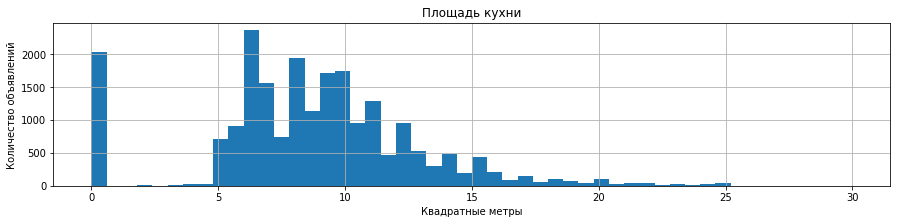

In [142]:
data.kitchen_area.hist(bins = 50, figsize = (15,3), range = (0, 30));
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()

Максимальное количество объявлений со значением около 10 кв.м, большая часть объявлений имеют площадь от 10 до 15 кв.м, кухни площадью более 21 кв.м встречаются реже, среднее значение - 9,6 кв.м, медиана 9 кв.м почти не отличаются.

In [143]:
data['last_price'].describe() # Цена объекта

count    21617.000000
mean         4.953308
std          2.419639
min          0.430000
25%          3.305000
50%          4.450000
75%          6.080000
max         13.595000
Name: last_price, dtype: float64

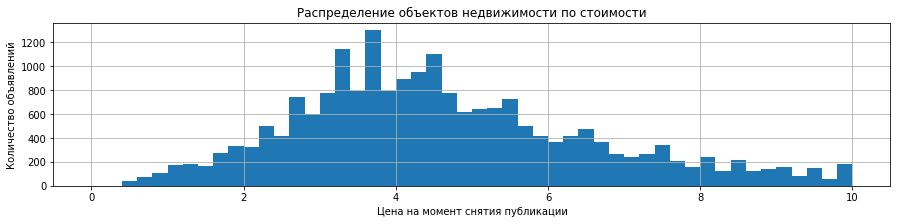

In [144]:
data.last_price.hist(bins = 50, figsize = (15,3), range = (0, 10));
plt.title('Распределение объектов недвижимости по стоимости')
plt.xlabel('Цена на момент снятия публикации')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир продаётся в диапазоне цен от 2 до 6 млн. руб., меньше всего объявлений стоимостью до 2 млн и больше 8 млн, максимальное количество объявлений стоимостью около 4 млн. 

In [145]:
data['rooms'].describe() # Число комнат

count    21617.000000
mean         1.941620
std          0.910664
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

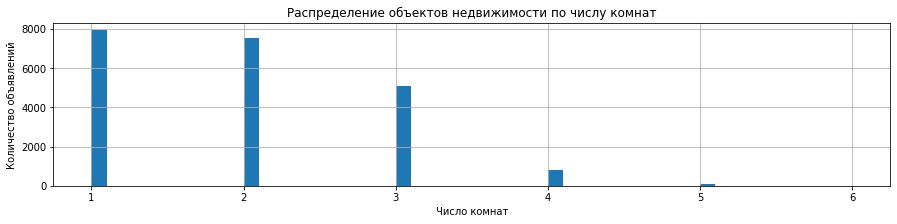

In [146]:
data.rooms.hist(bins = 50, figsize = (15,3), range = (1, 6));
plt.title('Распределение объектов недвижимости по числу комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество объявлений')
plt.show()

Наибольшее количество предложений по однокомнатным и двухкомнатным квартрам, начиная с четерехкомнатных предложения падают.

In [147]:
data['ceiling_height'].describe() # Высота потолков

count    21617.000000
mean         2.673804
std          0.182148
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

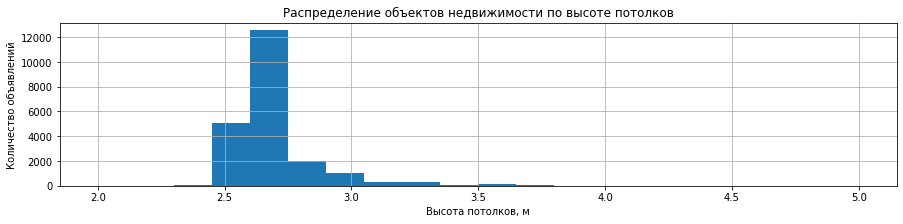

In [148]:
data.ceiling_height.hist(bins = 20, figsize = (15,3), range = (2, 5));
plt.title('Распределение объектов недвижимости по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

Чаще всего встречаются объявления с высотой потолков 2.60, совсем реже больше 3 м.

In [149]:
data['floor'].describe() # Этаж квартиры

count    21617.000000
mean         5.880279
std          4.870901
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [150]:
data['floor'].value_counts()

2     3047
1     2784
3     2758
4     2497
5     2371
6     1162
7     1107
8      999
9      993
10     636
11     485
12     477
13     353
15     317
14     312
16     295
17     208
18     162
19     124
21     108
22     104
20      99
23      91
24      57
25      41
26      22
27       8
Name: floor, dtype: int64

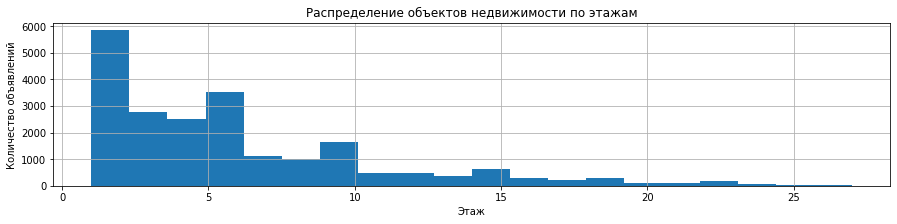

In [151]:
data.floor.hist(bins = 20, figsize = (15,3), range = (1, 27));
plt.title('Распределение объектов недвижимости по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

Наибольшее количество объявлений с квартирами с 1 по 6 этаж.

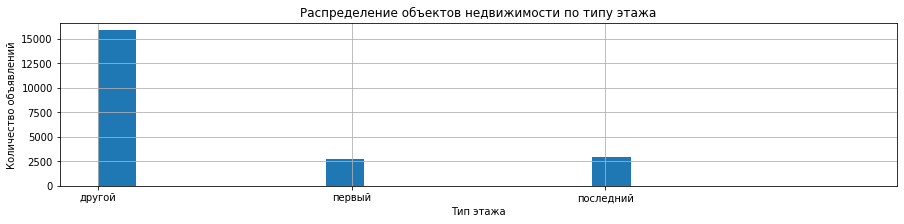

In [152]:
data.floor_type.hist(bins = 20, figsize = (15,3), range = (0,3)); # тип этажа квартиры 
plt.title('Распределение объектов недвижимости по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show()

Из графика можно сделать вывод, что количество объявлений по первому и последнему этажу горазд меньше, чем по остальным. 

In [153]:
data['floors_total'].describe() # Всего этажей в доме

count    21617.000000
mean        10.760281
std          6.569892
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

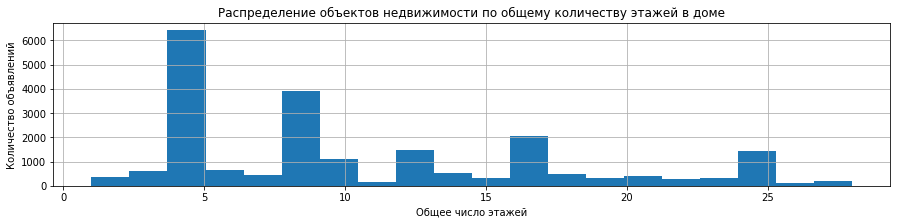

In [154]:
data.floors_total.hist(bins = 20, figsize = (15,3), range = (1,28));
plt.title('Распределение объектов недвижимости по общему количеству этажей в доме')
plt.xlabel('Общее число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Наибольшее количество объявлений по 5-этажным домам.

In [155]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [156]:
data['city_centers_nearest_km'].describe() # Расстояние до центра города 

count    16189.000000
mean        14.863920
std          8.538323
min          0.000000
25%         10.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

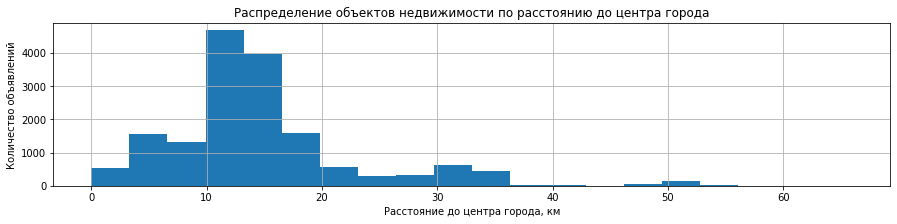

In [157]:
data['city_centers_nearest_km'].hist(bins = 20, figsize = (15,3), range = (0,66));
plt.title('Распределение объектов недвижимости по расстоянию до центра города')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир продаётся в диапазоне от 10 до 18 км от центра.

In [158]:
data['airports_nearest'] = data['airports_nearest'] / 1000 # переведем расстояние до аэропорта в км

In [159]:
data['airports_nearest'].describe() 

count    16174.000000
mean        28.933154
std         12.957152
min          0.000000
25%         18.079000
50%         27.122000
75%         37.636000
max         84.869000
Name: airports_nearest, dtype: float64

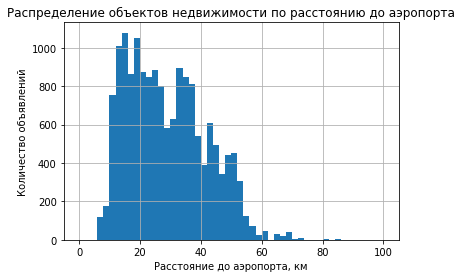

In [160]:
data['airports_nearest'].hist(bins=50, range=(0,100))
plt.title('Распределение объектов недвижимости по расстоянию до аэропорта')
plt.xlabel('Расстояние до аэропорта, км')
plt.ylabel('Количество объявлений')
plt.show()

Наиболее большое количество объявлениий от 10 до 40 км.

In [161]:
data['parks_nearest'].describe() 

count    6808.000000
mean      490.207550
std       328.552328
min         1.000000
25%       292.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

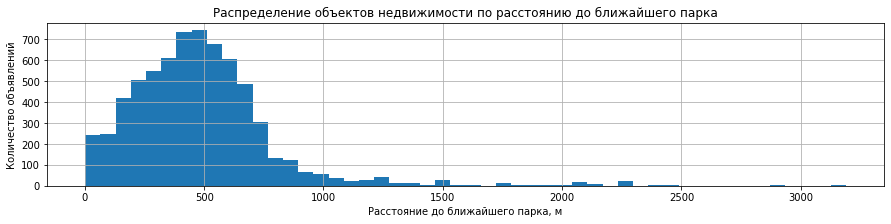

In [162]:
data['parks_nearest'].hist(bins=50, figsize = (15,3), range=(1,3190)) # расстояние до ближайшего парка (м)
plt.title('Распределение объектов недвижимости по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество объявлений')
plt.show()

Наибольшее число объявлений варьируется примерно от 200 до 750 м, встречаются выбивающиеся значения 1 м и значения больше 2500 м

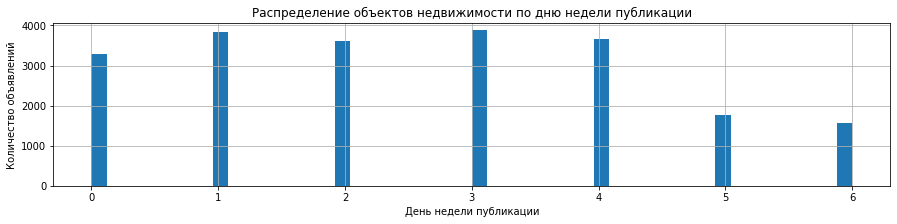

In [163]:
data['weekday_exposition'].hist(bins=50, figsize = (15,3), range=(0,6)) #день публикации объявления
plt.title('Распределение объектов недвижимости по дню недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Количество объявлений')
plt.show()

Чаще всего объявления публиковались с понедельника по пятницу

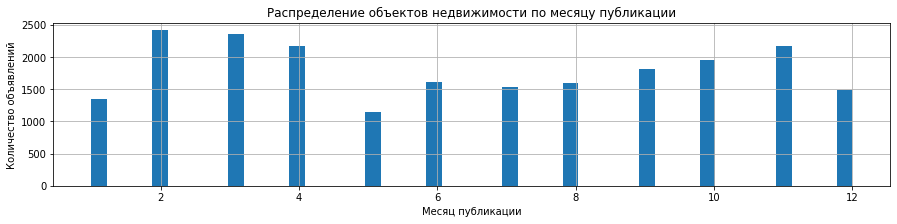

In [164]:
data['month_exposition'].hist(bins=50, figsize = (15,3), range=(1,12)) #месяц публикации объявления
plt.title('Распределение объектов недвижимости по месяцу публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество объявлений')
plt.show()

Наиболее часто объявления публиковались с марта по апрель (февраль не учитываем, так как это самый короткий месяц), нименьшее количество объявлений опубликовано в январе, мае, декабре.

Итак, обобщим, чаще всего объявления публиковались с понеделька по пятницу, с февраля по апрель по квартирам площадью 45 кв.м с жилой площадью 20 кв. м и площадью кухни около 10 кв.м, с высотой потолков 2.60, стоимость таких квартир около 4 млн руб, расположены на 2-5 этажах пятиэтажек, с расстоянием до центра города около 13 км, расстоянием до аэропорта около 23 км, расстоянием до парка примерно 500 м. 

#### Изучим, как быстро продавались квартиры 

In [165]:
data['days_exposition'].describe()

count    18933.000000
mean       169.740664
std        200.898309
min          3.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1200.000000
Name: days_exposition, dtype: float64

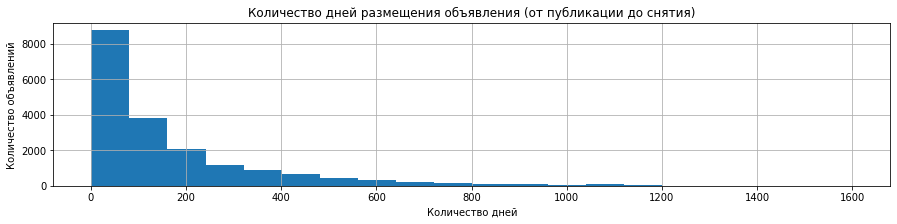

In [166]:
data['days_exposition'].hist(bins=20, figsize = (15,3), range=(1,1600)) #месяц публикации объявления
plt.title('Количество дней размещения объявления (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

In [167]:
data['year_exposition'].describe()

count    21617.000000
mean      2017.394366
std          1.010242
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64

Большинство квартир продаётся в течение трёх месяцев, этот факт подтверждается медианным значением. Средний срок продажи в 2 раза, скорее всего это связано с квартирами, которые не продаются очень долго по каким-то своим причинам.
Если количество дней публикации меньше 39 дней (25-го квантиля), то это можно считать быстрой продажей, если количество дней публикации больше 193 (75-го квантиля), значит это долгие продажи.

In [168]:
sales_year = data.pivot_table(
    values=['days_exposition'],  
    index=['year_exposition'],  
    aggfunc='mean')  
print(sales_year)

                 days_exposition
year_exposition                 
2014                  802.200000
2015                  598.912514
2016                  318.668697
2017                  155.097697
2018                   92.255537
2019                   30.837095


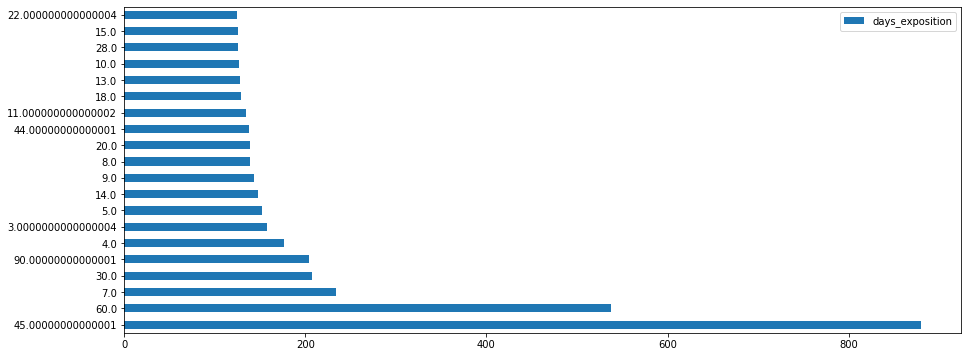

In [169]:
# check
# Моды на реальных данных
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

Выделяются моды на 45 и 60 дней, а значения на 44 и 45 дней, явно имеет техническую причину снятия, из-за формата числа. 
        
В нашем проекте — моды, из-за подозрения что это техническое снятие с продаж, могут искажать реальный расчет скорости продажи квартиры.

#### Изучим, зависит ли цена от следующих значений: общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год)

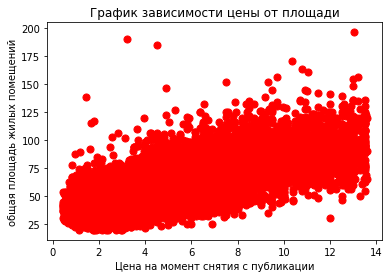

In [170]:
data.plot.scatter(x='last_price', y='total_area', s=50, c='red', title='График зависимости цены от площади')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('общая площадь жилых помещений')
plt.show()

In [171]:
print(data['last_price'].corr(data['total_area']).round(2)) # коффициент корреляции

0.72


Из графика видно, что между общей площадью квартиры и её стоимостью прослеживается явная прямая зависимость

In [172]:
dependence_price_living_area = data.pivot_table(index='last_price', values=['living_area'])

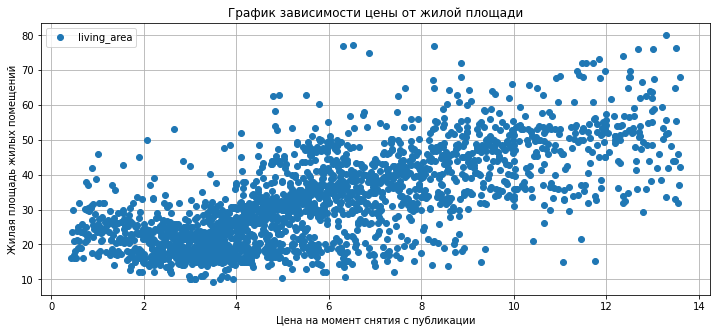

In [173]:
dependence_price_living_area.plot(style='o', grid=True, figsize=(12, 5), title='График зависимости цены от жилой площади')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Жилая площадь жилых помещений')
plt.show()

In [174]:
print(data['last_price'].corr(data['living_area']).round(2)) # коффициент корреляции

0.6


Аналогично, цена зависит как и от общей площади так и от жилой площади.

In [175]:
dependence_price_kitchen_area = data.pivot_table(index='last_price', values=['kitchen_area'])

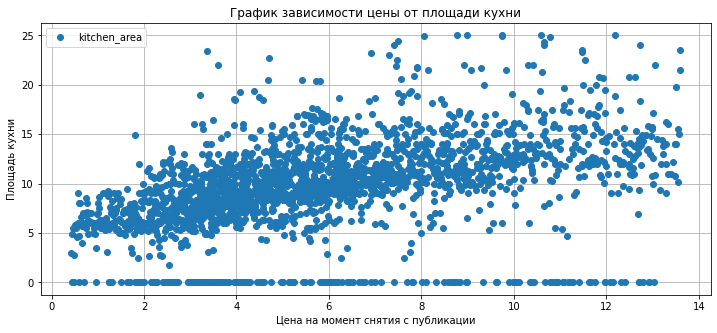

In [176]:
dependence_price_kitchen_area.plot(style='o', grid=True, figsize=(12, 5), title='График зависимости цены от площади кухни')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь кухни')
plt.show()

In [177]:
print(data['last_price'].corr(data['kitchen_area']).round(2)) # коффициент корреляции

0.41


Имеются выбросы, но цена также зависит от площади кухни.

In [178]:
dependence_price_floor_type = data.pivot_table(index='floor_type', values=['last_price']).\
sort_values(by='last_price', ascending=True) 

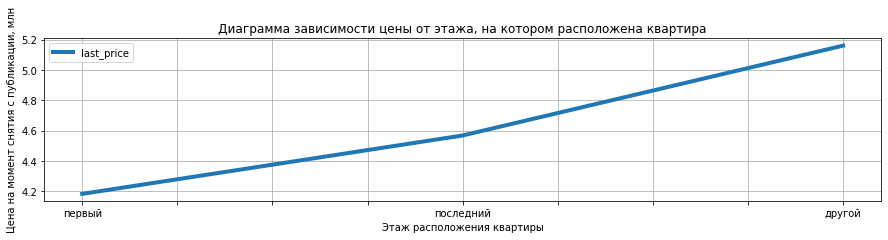

In [179]:
dependence_price_floor_type.plot(grid=True, figsize=(15,3), linewidth=4, \
                                 title='Диаграмма зависимости цены от этажа, на котором расположена квартира')
plt.ylabel('Цена на момент снятия с публикации, млн')
plt.xlabel('Этаж расположения квартиры')
plt.show()

Из графика видно,что цена ниже на первых этажах.

In [180]:
dependence_price_rooms = data.pivot_table(index='rooms', values=['last_price'])

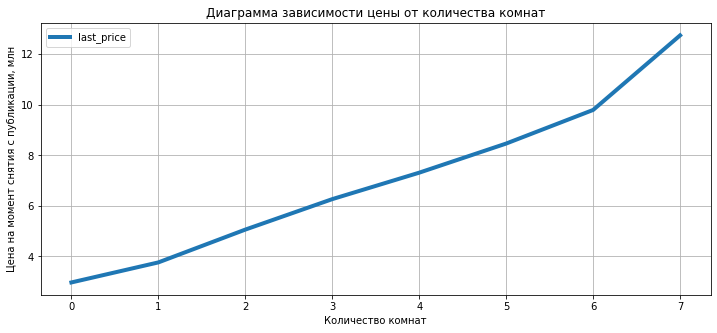

In [181]:
dependence_price_rooms.plot(grid=True, figsize=(12, 5), linewidth=4, title='Диаграмма зависимости цены от количества комнат')
plt.ylabel('Цена на момент снятия с публикации, млн')
plt.xlabel('Количество комнат')
plt.show()

По графику видно, что количество комнат не зависит от стоимости квартиры.

Зависимость цены от даты размещения: дня недели, месяца и года

In [182]:
dependence_price_weekday_exposition = data.pivot_table(index='weekday_exposition', values=['last_price'])

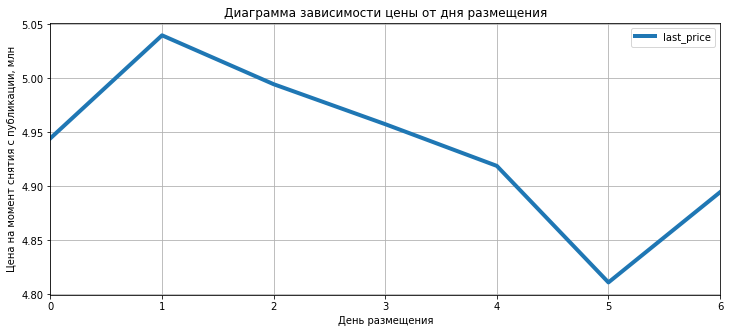

In [183]:
dependence_price_weekday_exposition.plot(grid=True, figsize=(12, 5), linewidth=4, \
                                         title='Диаграмма зависимости цены от дня размещения')
plt.ylabel('Цена на момент снятия с публикации, млн')
plt.xlabel('День размещения')
plt.xlim(0, 6)
plt.show()

In [184]:
dependence_price_month_exposition = data.pivot_table(index='month_exposition', values=['last_price'])

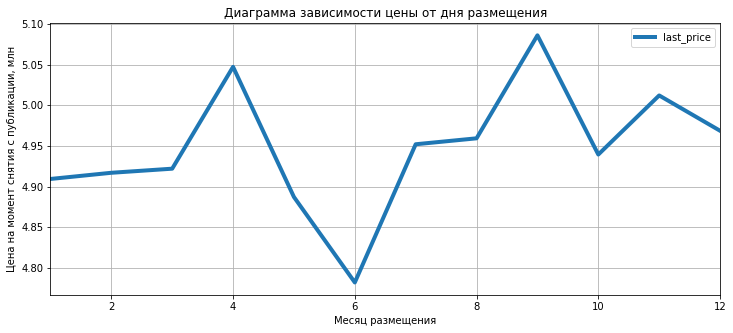

In [185]:
dependence_price_month_exposition.plot(grid=True, figsize=(12, 5), linewidth=4, \
                                       title='Диаграмма зависимости цены от дня размещения')
plt.ylabel('Цена на момент снятия с публикации, млн')
plt.xlabel('Месяц размещения')
plt.xlim(1, 12)
plt.show()

In [186]:
dependence_price_year_exposition = data.pivot_table(index='year_exposition', values=['last_price'])

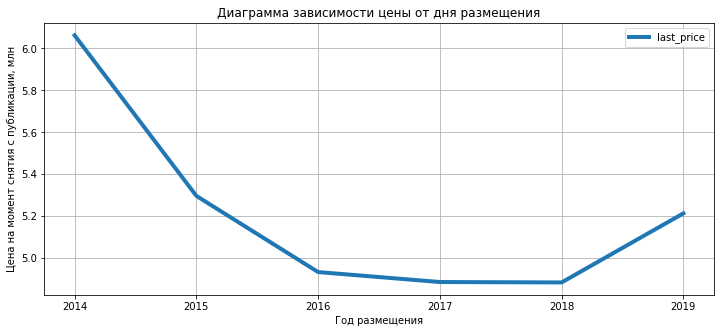

In [187]:
dependence_price_year_exposition.plot(grid=True, figsize=(12, 5), linewidth=4, \
                                      title='Диаграмма зависимости цены от дня размещения')
plt.ylabel('Цена на момент снятия с публикации, млн')
plt.xlabel('Год размещения')
plt.show()

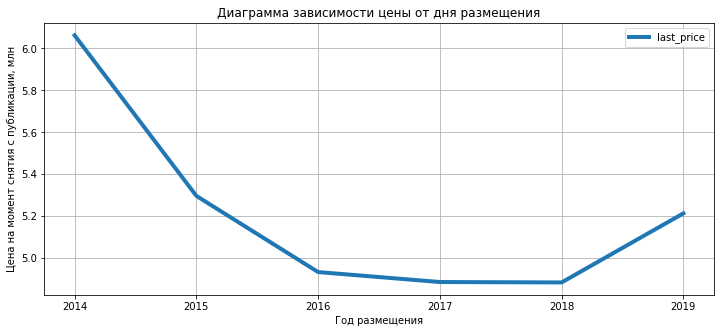

In [188]:
dependence_price_year_exposition.plot(grid=True, figsize=(12, 5), linewidth=4, \
                                      title='Диаграмма зависимости цены от дня размещения')
plt.ylabel('Цена на момент снятия с публикации, млн')
plt.xlabel('Год размещения')
plt.show()

Рассмотрим взаимное влияние параметров: количество объявлений и изменение средней цены и средней площади по годам

In [189]:
dependence_count_year_exposition = data.pivot_table(index='year_exposition', values=['last_price', 'total_area'], \
                                                    aggfunc='mean')

In [190]:
print(dependence_count_year_exposition)

                 last_price  total_area
year_exposition                        
2014               6.062206   64.676220
2015               5.296966   58.326935
2016               4.933989   54.838869
2017               4.886564   53.768012
2018               4.884561   52.823358
2019               5.213844   52.681602


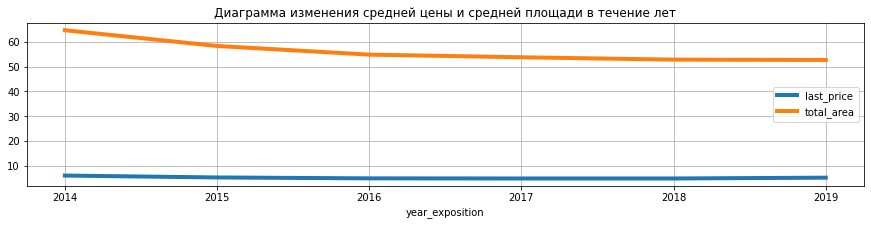

In [191]:
dependence_count_year_exposition.plot(grid=True, figsize=(15, 3), linewidth=4, \
                                      title='Диаграмма изменения средней цены и средней площади в течение лет')
plt.show()

Можно сделать вывод, что объявления размещённые в субботу и воскресенье имеют меньшую цену, чем в другие дни недели. На графике помесячного размещения объявлений хорошо просматирваются два падения - это в июне и октябре, по годовой тенденции наблюдается падение в стоимости жилья в 2015-2017 годах и резкий взлёт стоимости начиная с 2018 года, что вызвано скорей всего большим спросом на рынке недвижимости.
Можно обрать внимание, что в 2014 году средняя цена квартир была максимальна, как и средняя площадь, с 2015 по 2018 средняя стоимость квартир находиолась на том же уровне, а вот средняя площадь с каждым годом уменьшается.

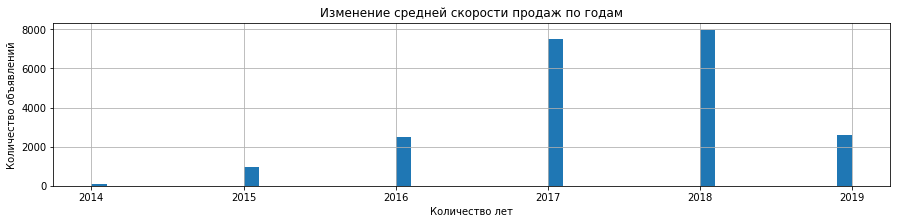

In [192]:
data['year_exposition'].hist(bins=50, figsize = (15,3), range=(2014,2019)) #месяц публикации объявления
plt.title('Изменение средней скорости продаж по годам')
plt.xlabel('Количество лет')
plt.ylabel('Количество объявлений')
plt.show()

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [193]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').\
sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10.columns=['number_ads']
data_top_10
# определим населенный пункт с наибольши количеством объявлений

,number_ads
locality_name,
Санкт-Петербург,13838
поселок Мурино,583
Кудрово,463
поселок Шушары,435
Всеволожск,392
Пушкин,338
Колпино,335
поселок Парголово,325
Гатчина,302


Лидером по количеству объявлений является г. Санкт-Петербург

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [194]:
data_top_10['price_one_square_meter_mean'] = data.pivot_table(index='locality_name', values='price_one_square_meter', \
                                                              aggfunc='mean')
data_top_10['price_one_square_meter_mean'] = round(data_top_10['price_one_square_meter_mean'], 2)

In [195]:
print(data_top_10)

                   number_ads  price_one_square_meter_mean
locality_name                                             
Санкт-Петербург         13838                    106431.09
поселок Мурино            583                     86012.11
Кудрово                   463                     95348.28
поселок Шушары            435                     78594.61
Всеволожск                392                     67071.91
Пушкин                    338                    100647.92
Колпино                   335                     75433.43
поселок Парголово         325                     90259.74
Гатчина                   302                     68355.55
Выборг                    232                     57882.14


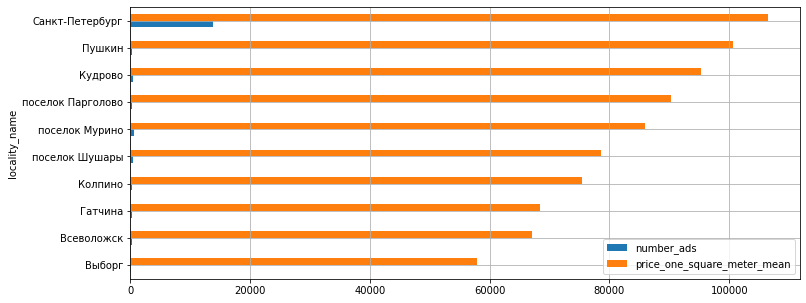

In [196]:
data_top_10.sort_values(by='price_one_square_meter_mean').plot(kind='barh', legend=True, grid=True, figsize=(12, 5));


Можно сказать, что низкое количество объявлений не сильно влияет на цену кв.м, так например Пушкин и посёлок Парголово имеют практически ту же цену в 100 т.р. за кв. метр как и в Санкт-Петербурге.

#### Выделим квартиры в Санкт-Петербурге  с помощью столбца locality_name и вычислим среднюю цену каждого километра

In [197]:
flat_spb = data.query('locality_name == "Санкт-Петербург"') #выбираем только квартиры в Санкт-Петербурге

In [198]:
flat_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
7,5,7.915,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
9,18,5.400,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5.050,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой,14.0


In [199]:
# посмотрим длину получившегося df
len(flat_spb)

13838

11005 объявлений из Санкт-Петербурга. Определим центр с помощью стоимости квадратного метра. Построим график. Та точка, после которой пойдет явный спад в стоимости и будем считать за границы центра города.

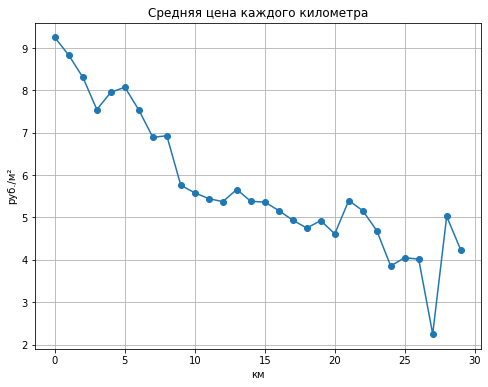

In [200]:
# Рассчитаем среднюю цену вычислим среднюю цену каждого километра
(
flat_spb
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=['mean'])
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Cредняя цена каждого километра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()


Исходя из графика можно сказать, что резкий спад цены начинается на 7 км, это может говорить о том, это центр города, на 27-м км наблюдаются аномальные значения.

Стоит изучить записи, которые привели к выбросу на 27-м км.

In [201]:
flat_spb27 = data.query('locality_name == "Санкт-Петербург" & city_centers_nearest_km >= 27')

In [202]:
flat_spb27.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
814,0,7.600,111.0,2017-07-26,3,3.00,16,63.0,12,False,...,185.0,2,72.0,66.0,68468.468468,2,7,2017,другой,28.0
1111,0,4.072,38.0,2015-10-14,1,2.65,5,16.0,4,False,...,NaN,0,NaN,285.0,107157.894737,2,10,2015,другой,28.0
5961,6,2.250,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,0,NaN,178.0,70312.500000,1,2,2018,последний,27.0
9572,0,3.413,43.0,2015-11-10,1,2.65,5,18.0,1,False,...,NaN,0,NaN,258.0,79372.093023,1,11,2015,первый,28.0
10798,10,4.850,62.0,2017-05-16,3,2.65,5,35.7,1,False,...,NaN,0,NaN,63.0,78225.806452,1,5,2017,первый,29.0


Возможно выбросом является то, что на 27 километре квартира расположена в двухэтажном доме на втором этаже.

Удельный вес объявлениями на 2-ом километре: другой-54%, первый-20%, последний-25%;
на 3-ем километре:другой-60%, первый-19%, последний-21%;
на 4-ом километре:другой-70%, первый-15%, последний-15%;
на 5-ом километре:другой-74%, первый-11%, последний-15%.
На на 5-ом километре самое максимальное количество объявлений с квартирами всех этажей кроме первого и последнего.

Рассмотрим записи в центре

In [206]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (city_centers_nearest_km <= 7)')

Площадь (медиана): 51 

Площадь в центре (медиана): 66 

Площадь (среднее): 55 

Площадь в центре (среднее): 68 



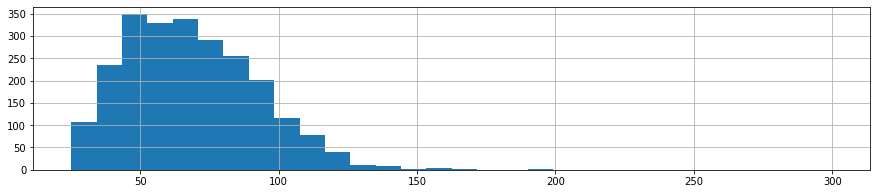

In [207]:
# Изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(15,3))
plt.show()

Цена (медиана): 5 

Цена в центре (медиана): 8 

Цена (среднее): 6 

Цена в центре (среднее): 8 



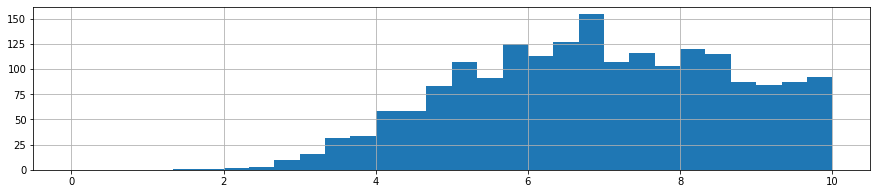

In [208]:
# Изучим цену на момент снятия публикации
print('Цена (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['last_price'].median()),'\n')
print('Цена в центре (медиана):', round(spb_center['last_price'].median()),'\n')
print('Цена (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['last_price'].mean()),'\n')
print('Цена в центре (среднее):', round(spb_center['last_price'].mean()),'\n')
spb_center['last_price'].hist(bins=30, range=(0,10), figsize=(15,3));

In [209]:
# Изучим высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(), 2),'\n')
print('Высота потолков в центре (среднее):', round(spb_center['ceiling_height'].mean(), 2),'\n')

Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.75 

Высота потолков (среднее): 2.69 

Высота потолков в центре (среднее): 2.89 



Факт, чем ближе к центру, тем выше цена, это связано с тем, что площадь квартир в центре больше (Площадь (медиана): 51 
Площадь в центре (медиана): 66), высота потолков в центре выше (Высота потолков (медиана): 2.65, Высота потолков в центре (медиана): 2.75 ), центр города- это престижность и общедоступность.

### Общий вывод

**Цель исследования:** выполнение предобработки данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах и изучение их, для того чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

В первом этапе исследования необходимо было найти пропуски и заполнить по возможности отсутствующие значения.
Пропуски найдены в 14 столбцах, основная причина незаполнения данных - человечечкий фактор (либо данные неизвестны собственнику, либо не захотел их заполнять). Пропуски заменены в столбцах is_apartment, kitchen_area, balcony.

Далее рассмотрены типы данных в каждом столбце, неверный тип данных  был обнаружен в следующих столбцах: Дата публикации first_day_exposition (object-должно быть datetime) Апартаменты is_apartment (object-должно быть bool) Число балконов balcony (float - должно быть int) Число водоемов в радиусе 3 км ponds_around3000 (float - должно быть int), Общее количество этажей floors_total (float - должно быть int).

Следущим этапом является изучение уникальных значений в столбце с названиями и устрание неявных дубликатов.
Приведены к единому стилю наименования столбцов:cityCenters_nearest, parks_around3000, ponds_around3000; выполнена замена написания 'посёлок' на 'поселок' и убраны повторы в названиях населенных пунктов в столюце locality_name.
Далее устранены редкие и выбивающиеся значения в следующих столбцах: ceiling_height, floors_total, last_price, total_area.
Добавлены в таблицу новые столбцы price_one_square_meter(цена одного квадратного метра),weekday_exposition (день недели публикации объявления), month_exposition (месяц публикации объявления), year_exposition (год публикации объявления), floor_type (тип этажа квартиры), city_centers_nearest_km (расстояние до центра города в километрах).

По итогам расчетов данных столбцов можно сказать следующее: средняя цена за кв.метр составляет 99 тыс.руб; количество предложений на рынке недвижимости было максимальным значением в 2017 и 2018 годах, а вот в 2019 количество предложений сократилось в 3 раза и вернулось на уровень 2016 года; более актуальны квартиры на любом этаже кроме первого и последнего.
Проведен исследовательский анализ данных по следующим параметрам объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.
По итогам анализа можно сделать вывод, что чаще всего объявления публиковались с понеделька по пятницу, с марта по апрель по квартирам площадью 45 кв.м с жилой площадью 20 кв. м и площадью кухни около 10 кв.м, с высотой потолков 2.60, стоимость таких квартир около 4 млн руб, расположены на 2-5 этажах пятиэтажек, с расстоянием до центра города около 13 км, расстоянием до аэропорта около 23 км, расстоянием до парка примерно 500 м.

Большинство квартир продаётся в течение трёх месяцев, этот факт подтверждается медианным значением. Средний срок продажи в 2 раза, скорее всего это связано с квартирами, которые не продаются очень долго по каким-то своим причинам. Если количество дней публикации меньше 39 дней (25-го квантиля), то это можно считать быстрой продажей, если количество дней публикации больше 193 (75-го квантиля), значит это долгие продажи.

Наибольшее влияние на общую (полную) стоимость объекта имеют общая площадь квартиры. жилая площадь, площадь кухни, наименьшее - дата публикации и количество комнат, цена квартиры ниже на первых этажах.
Построены графики, которые показывают зависимость цены от указанных выше параметров.
Лидером по количеству объявлений о продаже квартиры является г. Санкт-Петербург. низкое количество объявлений не сильно влияет на цену кв.м, так например Пушкин и посёлок Парголово имеют практически ту же цену в 100 т.р. за кв. метр как и в Санкт-Петербурге. Факт, чем ближе к центру Санкт-Петербурга, тем выше цена, это связано с тем, что площадь квартир в центре больше (Площадь (медиана): 51 
Площадь в центре (медиана): 66), высота потолков в центре выше (Высота потолков (медиана): 2.65, Высота потолков в центре (медиана): 2.75 ), и, конечно же,  центр города - это престижность и общедоступность.